In [41]:
!pip install opendatasets


In [42]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv")

Skipping, found downloaded files in "./credit-score-classification" (use force=True to force download)


In [43]:
import pandas as pd
data = pd.read_csv("./credit-score-classification/train.csv")

/tmp/ipython-input-43-3197641299.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./credit-score-classification/train.csv")


In [44]:
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [45]:

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [46]:
df = data.iloc[0:5000, [1, 3, 4, 6, 7, 21, 27]]

print(df)

     Customer_ID           Name   Age Occupation Annual_Income  \
0      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
1      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
2      CUS_0xd40  Aaron Maashoh  -500  Scientist      19114.12   
3      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
4      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
...          ...            ...   ...        ...           ...   
4995  CUS_0x69ea         Chucks    19    Manager      77519.04   
4996  CUS_0x69ea         Chucks    19    Manager      77519.04   
4997  CUS_0x69ea         Chucks    20    Manager      77519.04   
4998  CUS_0x69ea         Chucks    20    Manager      77519.04   
4999  CUS_0x69ea         Chucks    20    Manager      77519.04   

         Credit_History_Age Credit_Score  
0     22 Years and 1 Months         Good  
1                       NaN         Good  
2     22 Years and 3 Months         Good  
3     22 Years and 4 Months        

In [47]:
df = df.drop_duplicates()
print(df)

     Customer_ID           Name   Age Occupation Annual_Income  \
0      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
1      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
2      CUS_0xd40  Aaron Maashoh  -500  Scientist      19114.12   
3      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
4      CUS_0xd40  Aaron Maashoh    23  Scientist      19114.12   
...          ...            ...   ...        ...           ...   
4995  CUS_0x69ea         Chucks    19    Manager      77519.04   
4996  CUS_0x69ea         Chucks    19    Manager      77519.04   
4997  CUS_0x69ea         Chucks    20    Manager      77519.04   
4998  CUS_0x69ea         Chucks    20    Manager      77519.04   
4999  CUS_0x69ea         Chucks    20    Manager      77519.04   

         Credit_History_Age Credit_Score  
0     22 Years and 1 Months         Good  
1                       NaN         Good  
2     22 Years and 3 Months         Good  
3     22 Years and 4 Months        

In [48]:
# Convert 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove rows where 'Age' is unrealistic numeric value
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df

,Customer_ID,Name,Age,Occupation,Annual_Income,Credit_History_Age,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,22 Years and 1 Months,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,NaN,Good
3,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,22 Years and 4 Months,Good
4,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,22 Years and 5 Months,Good
5,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,22 Years and 6 Months,Good
...,...,...,...,...,...,...,...
4995,CUS_0x69ea,Chucks,19.0,Manager,77519.04,8 Years and 8 Months,Good
4996,CUS_0x69ea,Chucks,19.0,Manager,77519.04,8 Years and 9 Months,Good
4997,CUS_0x69ea,Chucks,20.0,Manager,77519.04,8 Years and 10 Months,Good
4998,CUS_0x69ea,Chucks,20.0,Manager,77519.04,8 Years and 11 Months,Good


In [49]:
# Change Credit_History_Age column value to numeric in total months

# Function to convert credit history age string to total months
def convert_credit_history_to_months(age_str):
    if isinstance(age_str, str):
        parts = age_str.replace(' Years and ', ' ').replace(' Months', '').split()
        if len(parts) == 2:
            years = int(parts[0])
            months = int(parts[1])
            return years * 12 + months
    return None

# Apply the conversion function to the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_to_months)
df

,Customer_ID,Name,Age,Occupation,Annual_Income,Credit_History_Age,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,265.0,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,NaN,Good
3,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,268.0,Good
4,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,269.0,Good
5,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,270.0,Good
...,...,...,...,...,...,...,...
4995,CUS_0x69ea,Chucks,19.0,Manager,77519.04,104.0,Good
4996,CUS_0x69ea,Chucks,19.0,Manager,77519.04,105.0,Good
4997,CUS_0x69ea,Chucks,20.0,Manager,77519.04,106.0,Good
4998,CUS_0x69ea,Chucks,20.0,Manager,77519.04,107.0,Good


In [50]:
# Remove any missing values from the name column and keep only string values

# Drop rows where 'Name' is missing
df = df.dropna(subset=['Name'])

# Keep only rows where 'Name' is a string
df = df[df['Name'].apply(lambda x: isinstance(x, str))]

In [51]:
df.to_csv('credit_scores_cleaned.csv', index=False)
df

,Customer_ID,Name,Age,Occupation,Annual_Income,Credit_History_Age,Credit_Score
0,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,265.0,Good
1,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,NaN,Good
3,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,268.0,Good
4,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,269.0,Good
5,CUS_0xd40,Aaron Maashoh,23.0,Scientist,19114.12,270.0,Good
...,...,...,...,...,...,...,...
4995,CUS_0x69ea,Chucks,19.0,Manager,77519.04,104.0,Good
4996,CUS_0x69ea,Chucks,19.0,Manager,77519.04,105.0,Good
4997,CUS_0x69ea,Chucks,20.0,Manager,77519.04,106.0,Good
4998,CUS_0x69ea,Chucks,20.0,Manager,77519.04,107.0,Good


EDA

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_scores_cleaned.csv')
print(df.describe())
print(df['Credit_Score'].value_counts())

               Age  Credit_History_Age
count  3841.000000         3514.000000
mean     33.874251          227.206318
std       9.886258           97.297770
min      18.000000            1.000000
25%      26.000000          157.000000
50%      34.000000          225.000000
75%      42.000000          308.000000
max      56.000000          404.000000
Credit_Score
Standard    2034
Poor        1054
Good         753
Name: count, dtype: int64


In [53]:
import pandas as pd

df = pd.read_csv('credit_scores_cleaned.csv')
print(df.describe())
print(df['Credit_Score'].value_counts())
print(df['Occupation'].value_counts())


               Age  Credit_History_Age
count  3841.000000         3514.000000
mean     33.874251          227.206318
std       9.886258           97.297770
min      18.000000            1.000000
25%      26.000000          157.000000
50%      34.000000          225.000000
75%      42.000000          308.000000
max      56.000000          404.000000
Credit_Score
Standard    2034
Poor        1054
Good         753
Name: count, dtype: int64
Occupation
Architect        300
Media_Manager    287
_______          279
Doctor           268
Entrepreneur     265
Manager          252
Lawyer           244
Developer        238
Mechanic         238
Musician         238
Journalist       226
Writer           221
Teacher          216
Scientist        202
Accountant       187
Engineer         180
Name: count, dtype: int64


Calculate Average income by credit score.


In [54]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
income_by_score = df.groupby('Credit_Score')['Annual_Income'].mean().reset_index()
print(income_by_score)

  Credit_Score  Annual_Income
0         Good  155027.640407
1         Poor  118467.599944
2     Standard  189691.523284


Credit Score distribution by occupation


In [55]:
score_by_occupation = df.groupby(['Occupation', 'Credit_Score']).size().unstack().fillna(0)
print(score_by_occupation)

Credit_Score   Good  Poor  Standard
Occupation                         
Accountant       35    43       109
Architect        70    93       137
Developer        20    60       158
Doctor           53    83       132
Engineer         25    54       101
Entrepreneur     49    70       146
Journalist       45    44       137
Lawyer           30    75       139
Manager          54    70       128
Mechanic         59    46       133
Media_Manager    54    62       171
Musician         72    76        90
Scientist        34    55       113
Teacher          57    78        81
Writer           34    62       125
_______          62    83       134


Average credit history length by age group:

In [56]:
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
history_by_age = df.groupby('age_group')['Credit_History_Age'].mean().reset_index()
print(history_by_age)

  age_group  Credit_History_Age
0     20-30          215.581256
1     30-40          225.469912
2     40-50          236.470588
3     50-60          267.637755


/tmp/ipython-input-56-3033150925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  history_by_age = df.groupby('age_group')['Credit_History_Age'].mean().reset_index()


In [57]:
income_by_score.to_csv('income_by_score.csv', index=False)
score_by_occupation.to_csv('score_by_occupation.csv')
history_by_age.to_csv('history_by_age.csv', index=False)

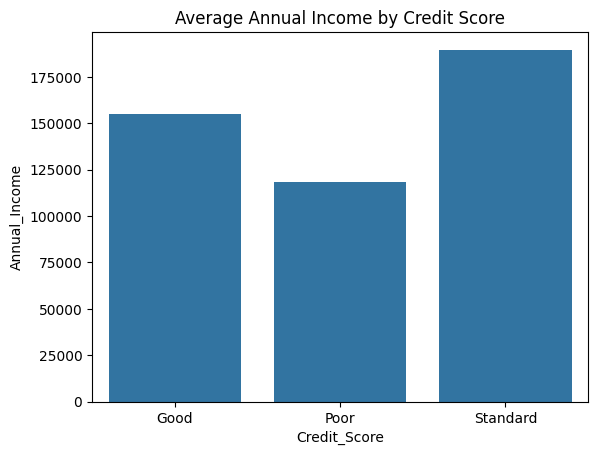

In [58]:
sns.barplot(data=income_by_score, x='Credit_Score', y='Annual_Income')
plt.title('Average Annual Income by Credit Score')
plt.show()

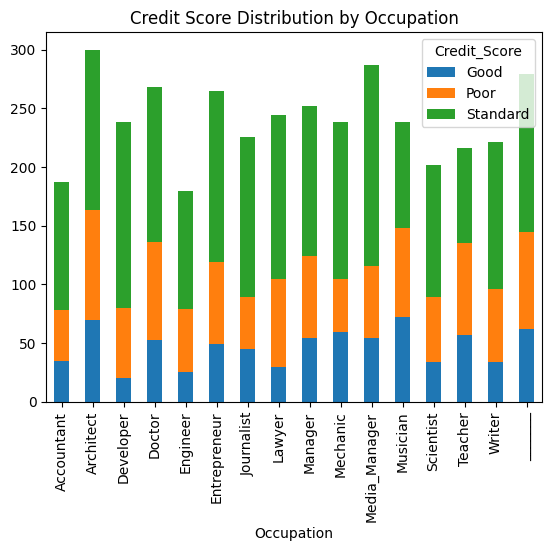

In [59]:
score_by_occupation.plot(kind='bar', stacked=True)
plt.title('Credit Score Distribution by Occupation')
plt.show()